In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import openpyxl

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# !pip install openpyxl
import plotly.express as px

# Using Tableau-Ready Dataset

In [4]:
tableau_df = pd.read_csv("tableau_ready_colleges_final.csv").drop(columns="Unnamed: 0")
tableau_df.head()

,Institution Name,state,sector_name,Unit ID,sector_code,median_earn_10yr,median_debt,net_price,aff_gap_student,aff_gap_parent,...,earnings_score,debt_score,net_price_score,aff_gap_score,aff_gap_parent_score,grad_score,equity_black,equity_latino,equity_score,value_equity_score
0,George C Wallace State Community College-Selma,AL,"Public, 2-year",101301.0,4.0,36041.0,10275.5,2699.0,-926.0,12074.505,...,0.405514,0.820906,0.926143,0.899228,0.940349,0.56,0.853659,0.95,0.901829,0.741933
1,Huntingdon College,AL,"Private not-for-profit, 4-year or above",101435.0,2.0,47921.5,27000.0,22851.0,19226.0,32226.505,...,1.000000,0.458394,0.755498,0.731355,0.776007,0.44,1.000000,0.87,0.935000,0.793757
2,Reid State Technical College,AL,"Public, 2-year",101994.0,4.0,27937.0,10275.5,107.0,-3518.0,9482.505,...,0.000000,0.820906,0.948092,0.920820,0.961487,0.56,0.853659,0.95,0.901829,0.627867
3,University of Alaska Anchorage,AK,"Public, 4-year or above",102553.0,1.0,47921.5,20500.0,13543.0,8373.0,25120.465,...,1.000000,0.599285,0.834317,0.821764,0.833958,0.32,0.768293,0.99,0.879146,0.841839
4,University of Alaska Southeast,AK,"Public, 4-year or above",102632.0,1.0,27937.0,20000.0,11027.0,5857.0,22604.465,...,0.000000,0.610122,0.855622,0.842723,0.854476,0.29,0.957317,0.71,0.833659,0.544549


In [7]:
'''
pct_black_ug     365
pct_latino_ug    365
pct_pell_ftft    656
'''
nans = tableau_df.isna().sum()
nans_cols = list(nans[nans > 0].index)
nans_cols

['pct_black_ug', 'pct_latino_ug', 'pct_pell_ftft']

In [10]:
for col in nans_cols:
    tableau_df[col] = tableau_df[col].fillna(np.nanmedian(tableau_df[col]))

In [13]:
best_k = 2
best_score = -1
tableau_inertias = []

'''PCA added'''

pca = PCA(2)

tableau_numeric = tableau_df.select_dtypes(include=[int, float])
tableau_numeric = pca.fit_transform(tableau_numeric)

for k in np.arange(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tableau_numeric)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(tableau_numeric, labels)
    tableau_inertias.append(kmeans.inertia_)
    print(f"For k={k}, the average silhouette score is: {silhouette_avg}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"For k={best_k}, the average silhouette score is: {best_score}")

For k=2, the average silhouette score is: 0.8007064676368028
For k=3, the average silhouette score is: 0.6044537934729931
For k=4, the average silhouette score is: 0.5018213794770424
For k=5, the average silhouette score is: 0.43360069232709536
For k=6, the average silhouette score is: 0.4064731647087337
For k=7, the average silhouette score is: 0.38434883545379406
For k=8, the average silhouette score is: 0.38315556009334456
For k=9, the average silhouette score is: 0.3904905977347954
For k=10, the average silhouette score is: 0.384198691633891
For k=11, the average silhouette score is: 0.38428494991206225
For k=12, the average silhouette score is: 0.37981422891047556
For k=13, the average silhouette score is: 0.3850350631588753
For k=14, the average silhouette score is: 0.38115967444370524
For k=2, the average silhouette score is: 0.8007064676368028


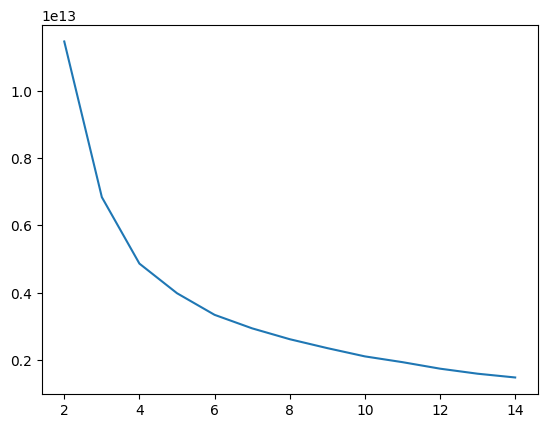

In [16]:
plt.plot(np.arange(2,15), tableau_inertias)
plt.show()

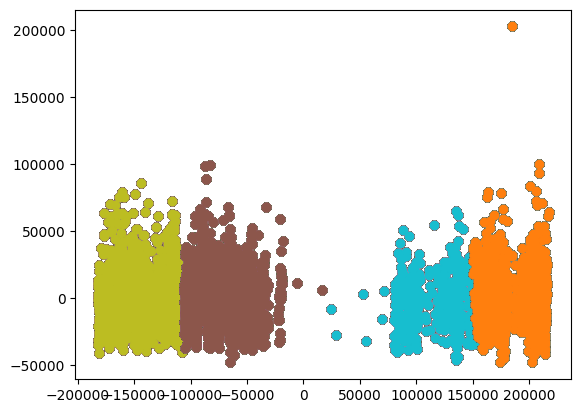

In [86]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(tableau_numeric)
labels = kmeans.labels_
for label in labels:
    filtered_label = tableau_numeric[labels == label]
    # plt.scatter(filtered_label[:, 0], filtered_label[:, 1])

In [92]:
display(tableau_numeric)

array([[-181894.95322395,  -34246.2481974 ],
       [-181025.44021113,   14025.48737175],
       [-181168.34965757,  -40992.3058786 ],
       ...,
       [ 214010.76394774,  -39074.1106014 ],
       [ 214146.67222662,  -37753.36038236],
       [ 214930.74944658,  -12555.53349418]])

##  K-Means Only with Score Columns

In [106]:
'''Drop value_equity_score since it is a weighted average of all of these scores'''
tableau_df_scores_cols = [col for col in tableau_df.columns if "score" in col]
tableau_df_scores = tableau_df[tableau_df_scores_cols]
tableau_df_scores = tableau_df_scores.drop(columns=['value_equity_score'])
tableau_df_scores

,earnings_score,debt_score,net_price_score,aff_gap_score,aff_gap_parent_score,grad_score,equity_score
0,0.405514,0.820906,0.926143,0.899228,0.940349,0.56,0.901829
1,1.000000,0.458394,0.755498,0.731355,0.776007,0.44,0.935000
2,0.000000,0.820906,0.948092,0.920820,0.961487,0.56,0.901829
3,1.000000,0.599285,0.834317,0.821764,0.833958,0.32,0.879146
4,0.000000,0.610122,0.855622,0.842723,0.854476,0.29,0.833659
...,...,...,...,...,...,...,...
6017,1.000000,0.539677,0.766455,0.784827,0.730332,0.74,0.902927
6018,0.000000,0.837715,0.815832,0.803412,0.827599,0.56,0.901829
6019,0.000000,0.837715,0.917912,0.891131,0.915202,0.56,0.901829
6020,0.000000,0.884675,0.906476,0.885712,0.910256,0.56,0.901829


In [109]:
best_k = 2
best_score = -1
tableau_score_inertias = []

'''PCA added'''

pca = PCA(2)

tableau_df_scores = pca.fit_transform(tableau_df_scores)

for k in np.arange(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tableau_df_scores)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(tableau_df_scores, labels)
    tableau_score_inertias.append(kmeans.inertia_)
    print(f"For k={k}, the average silhouette score is: {silhouette_avg}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"For k={best_k}, the average silhouette score is: {best_score}")

For k=2, the average silhouette score is: 0.7445004902821851
For k=3, the average silhouette score is: 0.7663057154721166
For k=4, the average silhouette score is: 0.7210849634726991
For k=5, the average silhouette score is: 0.7067553705142069
For k=6, the average silhouette score is: 0.7188124641199876
For k=7, the average silhouette score is: 0.713112022433395
For k=8, the average silhouette score is: 0.7108375954775972
For k=9, the average silhouette score is: 0.7150751534668188
For k=10, the average silhouette score is: 0.7108142334375142
For k=11, the average silhouette score is: 0.7010978195096734
For k=12, the average silhouette score is: 0.6828281872032955
For k=13, the average silhouette score is: 0.4371592976151807
For k=14, the average silhouette score is: 0.46493306261877754
For k=3, the average silhouette score is: 0.7663057154721166


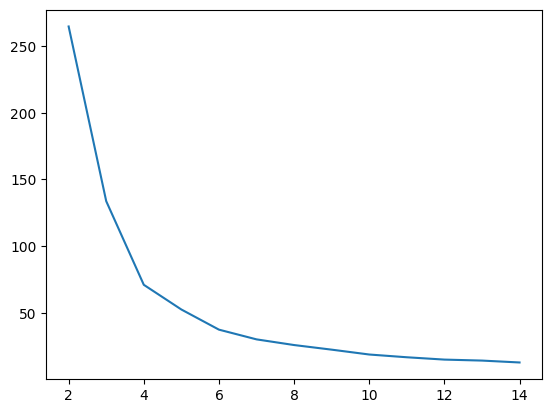

In [110]:
plt.plot(np.arange(2,15), tableau_score_inertias)
plt.show()

In [141]:
#https://www.askpython.com/python/examples/plot-k-means-clusters-python
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(tableau_df_scores)
labels = kmeans.labels_

pca_tableau = pd.DataFrame(tableau_df_scores)
pca_tableau['Institution Name'] = tableau_df['Institution Name']
pca_tableau['state'] = tableau_df['state']
pca_tableau['sector_name'] = tableau_df['sector_name']
pca_tableau['Label'] = labels

fig = px.scatter(pca_tableau, x=0, y=1, color='Label', hover_data=['Institution Name', 'state', 'sector_name'])
fig.show()

# for label in labels:
#     filtered_label = pca_tableau[labels == label]
#     #also has a size argument
#     #https://plotly.com/python/line-and-scatter/
#     fig = px.scatter(filtered_label, x=0, y=1, color='Label', hover_data=['Institution Name'])
#     fig.show()

# Using 25 Columns

In [2]:
cols_25 = pd.read_csv("clean_25_columns.csv")
cols_25.head()

,Institution Name,Net Price,Affordability Gap (net price minus income earned working 10 hrs at min wage),Weekly Hours to Close Gap,"Average Net Price for Low-Income Students, 2020-21",Bachelor's Degree Graduation Rate Bachelor Degree Within 6 Years - Total,Bachelor's Degree Graduation Rate Within 4 Years - Total,Median Earnings of Students Working and Not Enrolled 10 Years After Entry,Median Debt of Completers,Percent of Women Undergraduates,...,State Abbreviation,Sector Name,Institution Size Category Name,Control of Institution,HBCU,HSI,MSI Status,"First-Time, Full-Time Retention Rate",Transfer Out Rate,Total Percent of Applicants Admitted
0,George C Wallace State Community College-Selma,497.0,-3128.0,-8.6,1733.0,56.0,40.0,36041.0,10000.0,59.0,...,AL,"Public, 2-year","1,000 - 4,999",1,0.0,0.0,0.0,62.0,15.0,45.0
1,George C Wallace State Community College-Selma,1645.0,-1980.0,-5.5,1733.0,56.0,40.0,36041.0,10000.0,59.0,...,AL,"Public, 2-year","1,000 - 4,999",1,0.0,0.0,0.0,62.0,15.0,45.0
2,George C Wallace State Community College-Selma,3753.0,128.0,0.4,1733.0,56.0,40.0,36041.0,10000.0,59.0,...,AL,"Public, 2-year","1,000 - 4,999",1,0.0,0.0,0.0,62.0,15.0,45.0
3,George C Wallace State Community College-Selma,8060.0,4435.0,12.2,1733.0,56.0,40.0,36041.0,10000.0,59.0,...,AL,"Public, 2-year","1,000 - 4,999",1,0.0,0.0,0.0,62.0,15.0,45.0
4,Huntingdon College,18007.0,14382.0,39.7,19670.0,44.0,33.0,47921.5,27000.0,45.0,...,AL,"Private not-for-profit, 4-year or above","Under 1,000",2,0.0,0.0,1.0,72.0,25.0,69.0


In [10]:
key_columns = [
    # Core Affordability Metrics
    "Net Price",
    "Affordability Gap (net price minus income earned working 10 hrs at min wage)",
    "Weekly Hours to Close Gap",
    "Average Net Price for Low-Income Students, 2020-21",
    # Student Outcomes
    "Bachelor's Degree Graduation Rate Bachelor Degree Within 6 Years - Total",
    "Bachelor's Degree Graduation Rate Within 4 Years - Total",
    "Median Earnings of Students Working and Not Enrolled 10 Years After Entry",
    "Median Debt of Completers",
    # Equity Indicators
    "Percent of Women Undergraduates",
    "Percent of Undergraduates Age 25 to 64",
    "Percent of Black or African American Undergraduates",
    "Percent of Latino Undergraduates",
    "Percent of First-Time, Full-Time Undergraduates Awarded Pell Grants",
    # Institutional Characteristics
    "Institution Name",
    "State Abbreviation",
    "Sector Name",
    "Institution Size Category Name",
    "Control of Institution",
    # MSI Status (Minority Serving Institutions)
    "HBCU",
    "HSI",
    "MSI Status",
    # Additional Value Metrics
    "First-Time, Full-Time Retention Rate",
    "Transfer Out Rate",
    "Total Percent of Applicants Admitted"
]

In [11]:
needed_cols = ["Average Net Price for Low-Income Students, 2020-21",
"Median Earnings of Students Working and Not Enrolled 10 Years After Entry",
"Median Debt of Completers",
"Bachelor's Degree Graduation Rate Bachelor Degree Within 6 Years - Total",
"First-Time, Full-Time Retention Rate"]

trimmed = cols_25[needed_cols]

In [15]:
best_k = 2
best_score = -1
inertias = []
for k in np.arange(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(trimmed)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(trimmed, labels)
    inertias.append(kmeans.inertia_)
    print(f"For k={k}, the average silhouette score is: {silhouette_avg}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"For k={best_k}, the average silhouette score is: {best_score}")

For k=2, the average silhouette score is: 0.5081307352301867
For k=3, the average silhouette score is: 0.47030260616437664
For k=4, the average silhouette score is: 0.4125960663185429
For k=5, the average silhouette score is: 0.3805742718496124
For k=6, the average silhouette score is: 0.3668600776742731
For k=7, the average silhouette score is: 0.37370666699028804
For k=8, the average silhouette score is: 0.3951459411734064
For k=9, the average silhouette score is: 0.39156600581963424
For k=10, the average silhouette score is: 0.3951421740775141
For k=11, the average silhouette score is: 0.3788705402061144
For k=12, the average silhouette score is: 0.3691351238940706
For k=13, the average silhouette score is: 0.37352028327373576
For k=14, the average silhouette score is: 0.37037023273705655
For k=2, the average silhouette score is: 0.5081307352301867


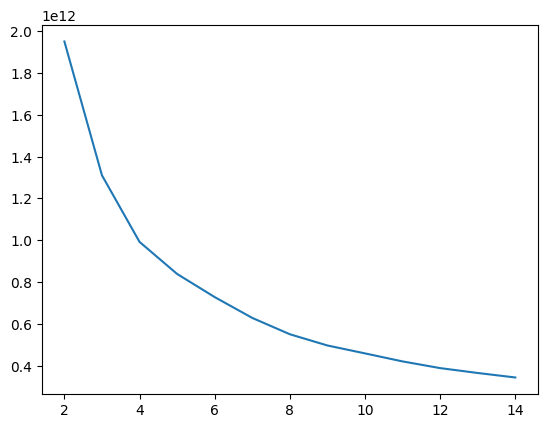

In [16]:
plt.plot(np.arange(2,15), inertias)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=172841fe-d13b-4ca9-99a4-5716bfc8b95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>